In [27]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("bmh")

In [6]:
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

org_data = rnd.multivariate_normal(mu, sigma, size=(1000))

In [10]:
sigma

array([[ 3.5, -1.8],
       [-1.8,  3.5]])

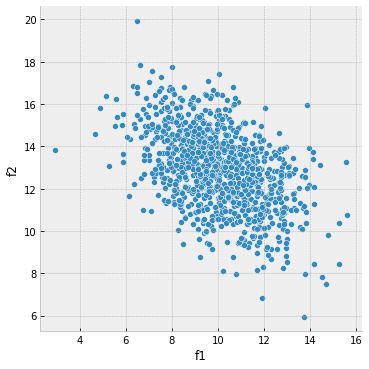

In [28]:
sns.relplot(
    x='f1', 
    y='f2', 
    data=pd.DataFrame(org_data, columns=["f1", "f2"]), 
    kind='scatter')

### 1. Subtract the mean of each column of the matrix

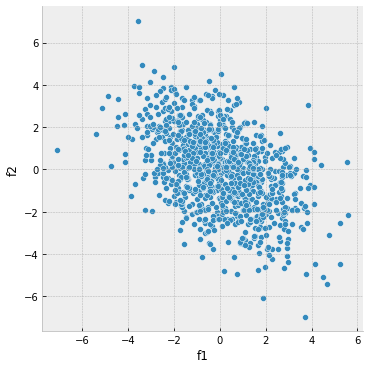

In [29]:
mean = np.mean(org_data, axis= 0)
mean_data = org_data - mean

sns.relplot(
    x='f1', 
    y='f2', 
    data=pd.DataFrame(mean_data, columns=["f1", "f2"]), 
    kind='scatter')

### 2. Compute the covariance matrix

In [14]:
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)

### 3. Compute the eigenvector of the covariance matrix

In [18]:
eig_val, eig_vec = np.linalg.eig(cov)

eig_val

array([1.75845987, 4.94154013])

In [19]:
eig_vec

array([[-0.72248964,  0.69138175],
       [-0.69138175, -0.72248964]])

In [20]:
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]

eig_val

array([4.94154013, 1.75845987])

In [21]:
eig_vec

array([[ 0.69138175, -0.72248964],
       [-0.72248964, -0.69138175]])

### 4. Compute explained variance

In [24]:
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val / sum_eig_val
cumulative_variance = np.cumsum(explained_variance)

explained_variance

array([0.7375433, 0.2624567])

In [25]:
cumulative_variance

array([0.7375433, 1.       ])

### 5. Transform data using eigen vectors

In [33]:
eig_vec

array([[ 0.69138175, -0.72248964],
       [-0.72248964, -0.69138175]])

In [32]:
mean_data

array([[ 1.8744574 , -1.64105937],
       [-0.45075043,  0.96626692],
       [ 0.07894242,  1.00886037],
       ...,
       [-0.01236512,  0.75677815],
       [-1.11006422, -0.93781293],
       [ 1.8660454 , -6.09905549]])

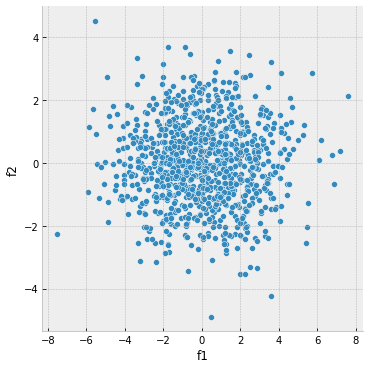

In [34]:
pca_data = np.dot(mean_data, eig_vec)

sns.relplot(
    x='f1', 
    y='f2', 
    data=pd.DataFrame(pca_data, columns=["f1", "f2"]), 
    kind='scatter')